## Taller 10: Nube de Palabras
Danilo Plazas Irreño

# Dialogos de South Park

In [37]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words("english")

import matplotlib.pyplot as plt
import PIL.Image
from IPython.display import display

In [38]:
path = 'C:/Users/Danilo/Documents/KonradLorenz/NLP/Taller10/All-seasons.csv'
data = pd.read_csv(path)
data.head(5)

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


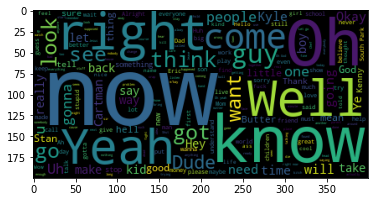

In [39]:
palabras = data.Line.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

In [42]:
import re
stopwords.extend(["s", "t", "now","re"])

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = [palabra for palabra in texto.split() if palabra not in stopwords]
    texto = " ".join(texto)
    return texto

data['pp'] = data.Line.apply(lambda texto: pre_procesado(texto))

data.head()

,Season,Episode,Character,Line,pp
0,10,1,Stan,"You guys, you guys! Chef is going away.",guys guys chef going away
1,10,1,Kyle,Going away? For how long?,going away long
2,10,1,Stan,Forever.,forever
3,10,1,Chef,I'm sorry boys.,sorry boys
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",chef said bored joining group called super adv...


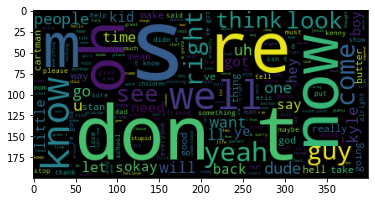

In [43]:
palabras = data2.pp.str.cat(sep=" ")
wordcloud = WordCloud().generate(palabras)

plt.imshow(wordcloud)
plt.show()

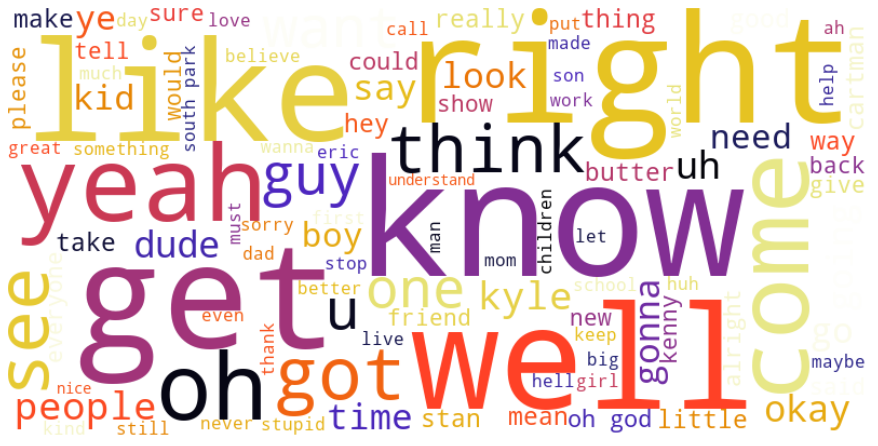

In [51]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=100,
                      background_color="white", colormap="CMRmap",
                      stopwords=stopwords).generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

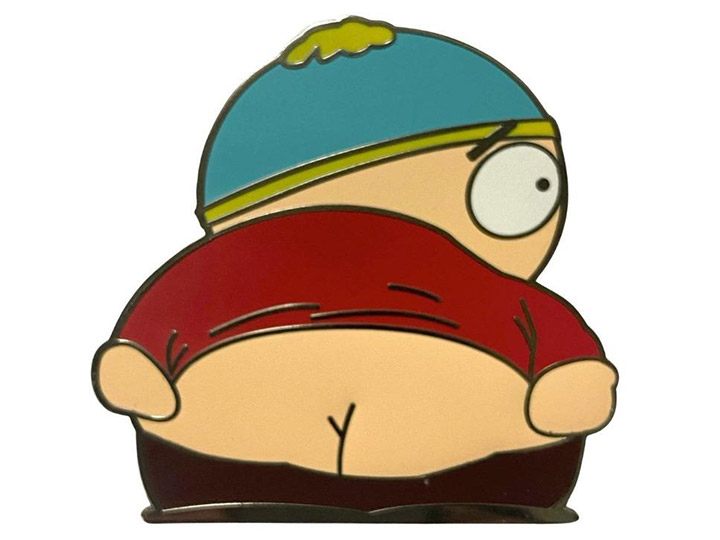

In [91]:
img = PIL.Image.open("C:/Users/Danilo/Documents/KonradLorenz/NLP/Taller10/SP2.png")
display(img)

In [92]:
mask = np.array(img)

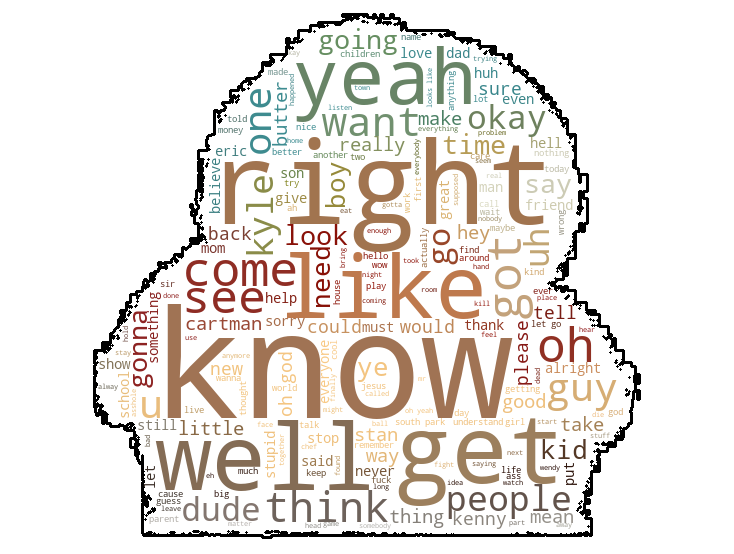

In [102]:
palabras = data.pp.str.cat(sep=" ")
wordcloud = WordCloud(width=800, height=400,
                      max_font_size=150, max_words=200,
                      background_color="white", colormap="CMRmap",
                      stopwords=stopwords, collocations=True,
                      mask=mask, contour_width=1.5,contour_color='black').generate(palabras) # https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

image_colors=ImageColorGenerator(mask)

wordcloud.to_file("SP2_T.png")

plt.figure(figsize=(10,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='nearest')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()